In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.info()

In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [3]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']



In [ ]:
Berlin.shape

In [4]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [ ]:
Berlin["totalRent"].describe()


Text(0, 0.5, 'Count')

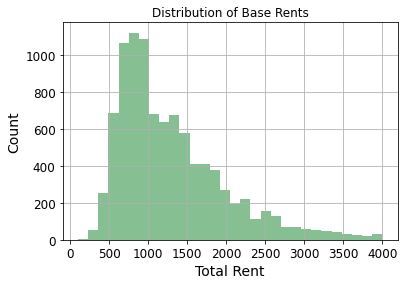

In [5]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


In [ ]:
Berlin.plot(kind="scatter", x="livingSpace", y="totalRent", alpha=0.1)


In [ ]:
Berlin.plot(kind="scatter", x="yearConstructed", y="totalRent", alpha=0.1)

In [6]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [7]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [8]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Fine tunning

## 1. Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
                     

y_predict = linear_regressor.predict(X_train.reshape(-1, 1))
print(y_predict)

[[6.57070402]
 [8.20573271]
 [7.01324964]
 ...
 [6.77316677]
 [6.94304684]
 [6.78024064]]


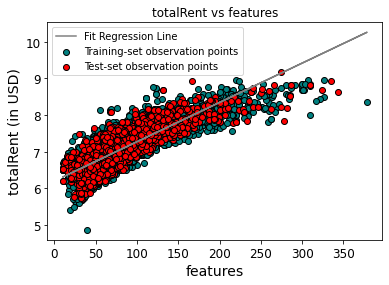

In [11]:
# Plot points and fit line for training data
plt.scatter(X_train.reshape(-1, 1), y_train.reshape(-1, 1), color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train, y_predict, color='grey', label='Fit Regression Line')
plt.title('totalRent vs features')
plt.xlabel('features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

## 2. Decision Tree model

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
tree_scores = cross_val_score(tree_reg, X_train.reshape(-1, 1), y_train.reshape(-1, 1),
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([0.3189565 , 0.30487152, 0.31061153, 0.33701766, 0.32190146,
       0.32958494, 0.31095985, 0.30495727, 0.31954354, 0.32075903])

In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.3189565  0.30487152 0.31061153 0.33701766 0.32190146 0.32958494
 0.31095985 0.30495727 0.31954354 0.32075903]
Mean: 0.31791632963469874
Standard deviation: 0.009841576888414107


In [14]:
from sklearn.linear_model import LinearRegression

lin_scores = cross_val_score(tree_reg, X_test.reshape(-1, 1), y_test.reshape(-1, 1),
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.35894241 0.33628415 0.32548225 0.36652833 0.34213354 0.36114019
 0.31986533 0.34965194 0.33114566 0.35271626]
Mean: 0.3443890071808887
Standard deviation: 0.015115004033087463


## 3. Random forest model

In [15]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [17]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
prediction = forest_reg.predict(X_test)
forest_mse21 = mean_squared_error(y_test, prediction)
forest_rmse21 = np.sqrt(forest_mse21)
print("rmse:", forest_rmse21)
print("mse:", forest_mse21)

rmse: 0.05493063776369606
mse: 0.0030173749651263918


In [18]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.0585803  0.06037203 0.05289801 0.06379149 0.04984986 0.05794691
 0.06146754 0.05949879 0.05592275 0.0610169 ]
Mean: 0.05813445974620033
Standard deviation: 0.0039933530238607335


In [19]:

scores = cross_val_score(forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.057843
std       0.004285
min       0.049641
25%       0.056476
50%       0.058437
75%       0.060675
max       0.063999
dtype: float64

### Fine tunning Random forest Regressor(Grid Search)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg3 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg3, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [21]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [22]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.11557235978658703 {'max_features': 2, 'n_estimators': 3}
0.09532839548450053 {'max_features': 2, 'n_estimators': 10}
0.08878427156758763 {'max_features': 2, 'n_estimators': 30}
0.08452087741024977 {'max_features': 4, 'n_estimators': 3}
0.07246935129780509 {'max_features': 4, 'n_estimators': 10}
0.06687560152801955 {'max_features': 4, 'n_estimators': 30}
0.07575541121719027 {'max_features': 6, 'n_estimators': 3}
0.06439270740358746 {'max_features': 6, 'n_estimators': 10}
0.061728244162227885 {'max_features': 6, 'n_estimators': 30}
0.07052161926108891 {'max_features': 11, 'n_estimators': 3}
0.06399464872404358 {'max_features': 11, 'n_estimators': 10}
0.06288911514315229 {'max_features': 11, 'n_estimators': 30}
0.10920733227257862 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.09294637680498997 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.0934739916480114 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.07680364033992913 {'bootstrap': False, 'm

### fine tunning Random forest regressor(RandomizedSearch)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg1 = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f465788fc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f46573a7100>},
                   scoring='neg_mean_squared_error')

In [25]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 142}

In [26]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=142)

In [27]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.0799713559814616 {'max_features': 3, 'n_estimators': 9}
0.0850894773307478 {'max_features': 2, 'n_estimators': 128}
0.06050945439388015 {'max_features': 6, 'n_estimators': 136}
0.06483442471131755 {'max_features': 4, 'n_estimators': 63}
0.06653337166291362 {'max_features': 4, 'n_estimators': 24}
0.06509320331292329 {'max_features': 4, 'n_estimators': 80}
0.07364000364549587 {'max_features': 3, 'n_estimators': 32}
0.11444689120717129 {'max_features': 1, 'n_estimators': 9}
0.06049454632611767 {'max_features': 7, 'n_estimators': 142}
0.10016949374947762 {'max_features': 1, 'n_estimators': 114}


In [28]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([9.36017742e-04, 5.36869945e-03, 6.14360667e-04, 2.00477459e-01,
       5.47303803e-02, 4.74651741e-04, 7.25012224e-01, 1.93534802e-03,
       6.82424162e-03, 3.93684126e-04, 4.78258226e-04, 2.75467529e-03])

In [31]:
final_model = rnd_search.best_estimator_

#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse0 = mean_squared_error(y_test, final_predictions)
final_rmse0 = np.sqrt(final_mse0)
print("rmse:", final_rmse0)
print("mse:", final_mse0)

rmse: 0.05359637712454556
mse: 0.002872571640876511


In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772, 1)
(1943, 1)
(7772,)
(1943,)


In [34]:
from sklearn.ensemble import RandomForestRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 42)
forest_regressor.fit(X_train, y_train)


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

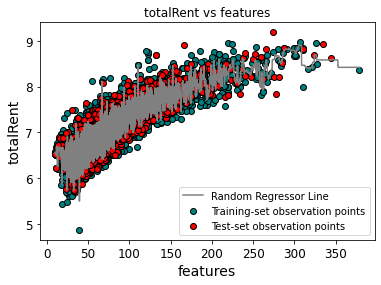

In [35]:

# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), color='grey', label='Random Regressor Line')
plt.title('totalRent vs features')
plt.xlabel('features')
plt.ylabel('totalRent')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

## 4. GradientBoosting 

In [36]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)
housing_predictions = grad_reg.predict(X_test)
grad_mse12 = mean_squared_error(y_test, housing_predictions)
grad_rmse12 = np.sqrt(grad_mse12)
print("final_rmse:", grad_rmse12)
print("final_mse:", grad_mse12)

final_rmse: 0.22775960855845861
final_mse: 0.0518744392907023


In [40]:
from sklearn.model_selection import cross_val_score

grad_scores = cross_val_score(grad_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-grad_scores)
display_scores(grad_rmse_scores)

Scores: [0.23243439 0.22952003 0.21846255 0.22871671 0.21462555 0.22842975
 0.22126938 0.21617496 0.22501065 0.23757788]
Mean: 0.22522218529844157
Standard deviation: 0.007079221695933813


In [41]:
scores = cross_val_score(grad_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.225201
std       0.007471
min       0.214626
25%       0.219110
50%       0.226720
75%       0.229315
max       0.237578
dtype: float64

### fine tunning gradientBoosting(Gridsearch)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

gradientBoosting_reg = GradientBoostingRegressor()

gradientBoosting_search = GridSearchCV(gradientBoosting_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
gradientBoosting_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [43]:
gradientBoosting_search.best_params_


{'max_features': 11, 'n_estimators': 30}

In [44]:
gradientBoosting_search.best_estimator_


GradientBoostingRegressor(max_features=11, n_estimators=30)

In [45]:
cvres = gradientBoosting_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4705874523487527 {'max_features': 2, 'n_estimators': 3}
0.37095513099100186 {'max_features': 2, 'n_estimators': 10}
0.26800773843820996 {'max_features': 2, 'n_estimators': 30}
0.4517821446033888 {'max_features': 4, 'n_estimators': 3}
0.3336539040786915 {'max_features': 4, 'n_estimators': 10}
0.24409427564065525 {'max_features': 4, 'n_estimators': 30}
0.4393338881885903 {'max_features': 6, 'n_estimators': 3}
0.315923556418599 {'max_features': 6, 'n_estimators': 10}
0.2372125975610521 {'max_features': 6, 'n_estimators': 30}
0.4315272796496659 {'max_features': 11, 'n_estimators': 3}
0.3056856991488105 {'max_features': 11, 'n_estimators': 10}
0.23435032792255397 {'max_features': 11, 'n_estimators': 30}
0.4611613999085992 {'max_features': 2, 'n_estimators': 3}
0.3619196733261659 {'max_features': 2, 'n_estimators': 10}
0.4522794921519248 {'max_features': 3, 'n_estimators': 3}
0.34090165144694534 {'max_features': 3, 'n_estimators': 10}
0.4481030498997475 {'max_features': 4, 'n_estimators': 

### fine tunning GradientBoosting (RandomizedSearch)

In [46]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

gradientBoost_reg1 = GradientBoostingRegressor()
gradientBoost_search = RandomizedSearchCV(gradientBoost_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
gradientBoost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f46572375e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f46570add90>},
                   scoring='neg_mean_squared_error')

In [47]:
gradientBoost_search.best_params_

{'max_features': 7, 'n_estimators': 163}

In [48]:
gradientBoost_search.best_estimator_

GradientBoostingRegressor(max_features=7, n_estimators=163)

In [49]:
cvres = gradientBoost_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2252763489628342 {'max_features': 5, 'n_estimators': 134}
0.2250221063583068 {'max_features': 7, 'n_estimators': 163}
0.23802942750365771 {'max_features': 6, 'n_estimators': 30}
0.2254318442314991 {'max_features': 7, 'n_estimators': 131}
0.23741150184335744 {'max_features': 1, 'n_estimators': 153}
0.22892669349299744 {'max_features': 5, 'n_estimators': 68}
0.234910450085063 {'max_features': 5, 'n_estimators': 35}
0.24546952987481369 {'max_features': 1, 'n_estimators': 94}
0.2251489033402976 {'max_features': 6, 'n_estimators': 193}
0.2266805925802136 {'max_features': 5, 'n_estimators': 101}


In [50]:
feature_boost_importances = gradientBoost_search.best_estimator_.feature_importances_
feature_boost_importances

array([1.44992200e-03, 4.73225812e-02, 1.89999220e-03, 6.54844355e-01,
       1.98796151e-01, 5.97268357e-04, 2.28527861e-02, 4.15798349e-02,
       1.00940296e-02, 8.69584916e-04, 1.96934945e-02])

In [52]:
final_model1 = gradientBoost_search.best_estimator_
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model1.predict(X_test)

final_mse2 = mean_squared_error(y_test, final_predictions)
final_rmse2 = np.sqrt(final_mse2)
print("final_rmse:", final_rmse2)
print("final_mse:", final_mse2)

final_rmse: 0.22744176435836622
final_mse: 0.051729756174446584


In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

gradient_regressor = GradientBoostingRegressor(n_estimators = 163, random_state =0)
gradient_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

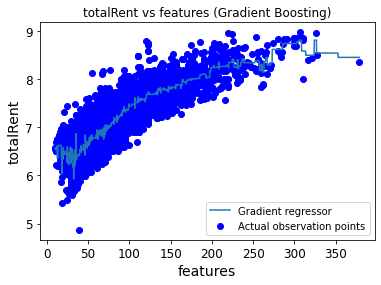

In [55]:
plt.scatter(X_train, y_train, color='blue', label='Actual observation points')
plt.plot(X_grid, gradient_regressor.predict(X_grid), label='Gradient regressor')
plt.title('totalRent vs features (Gradient Boosting)')
plt.xlabel('features')
plt.ylabel('totalRent')

plt.legend()
plt.show()